In [1]:
def gb():
    # Importing libraries
    import pandas as pd
    import numpy as np
    from datetime import datetime
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pickle
    import warnings 
    warnings.simplefilter('ignore')

    # Loading data
    df = pd.read_csv('SolarPrediction.csv')

    data = df

    # Converting UNIX time to datetime object
    data['Date']= pd.to_datetime(data['UNIXTime'],unit='s')

    # Setting the right timezone to the datetime object
    data['Date'] = data['Date'].dt.tz_localize('UTC').dt.tz_convert('HST')

    # Extracting date from Data column
    data['Data'] = pd.to_datetime(data['Data']).dt.date

    #Converting Sunrise and Sunset columns into datetime.time objects
    data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise']).dt.time
    data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet']).dt.time

    #Creating new sunset/sunrise columns featuring also the right date
    data['sunrise_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunRise']), axis = 1)
    data['sunset_time'] = data.apply(lambda row: pd.datetime.combine(row['Data'], row['TimeSunSet']), axis = 1)

    #Adding approriate timezone
    data['sunrise_time'] = data['sunrise_time'].dt.tz_localize('HST')
    data['sunset_time'] = data['sunset_time'].dt.tz_localize('HST')

    # Setting Date as index, sorting and dropping columns
    data.set_index('Date', inplace = True)

    data.sort_index()

    data.drop(columns = ['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], inplace = True)

    # Converting sunrise and sunset times into timestamp
    data['sunrise_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunrise_time']), axis = 1)
    data['sunset_timestamp'] = data.apply(lambda row: datetime.timestamp(row['sunset_time']), axis = 1)

    # Creating a column containing the number of daily light hours
    data['Hours_of_light'] = (data['sunset_timestamp'] - data['sunrise_timestamp'])/60/60

    # Creating column describing current time relative to sunrise/sunset
    data['Rel_time'] = (data['UNIXTime']- data['sunrise_timestamp'])/(data['sunset_timestamp']-data['sunrise_timestamp'])

    # Removing non-necessary columns
    data.drop(columns = ['UNIXTime','sunrise_timestamp', 'sunset_timestamp', 
                         'sunset_time', 'sunrise_time'], inplace = True)

    # Modeling

    df = data

    # Splitting dfset into targets and features
    X = df.drop(columns = 'Radiation')
    y = df.Radiation

    # Splitting df into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling df
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training models
    models = {'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Evaluating performance
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Printing results
        print(f"{name}: R^2={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")

        # Plotting predicted vs. actual values
        plt.figure()
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Solar Radiation')
        plt.ylabel('Predicted Solar Radiation')
        plt.title(name)


Gradient Boosting: R^2=0.883, MAE=57.354, RMSE=107.920
         10216575 function calls (10179132 primitive calls) in 14.511 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    2.662    0.027    2.662    0.027 {method 'build' of 'sklearn.tree._tree.DepthFirstTreeBuilder' objects}
     5035    1.203    0.000    1.203    0.000 {built-in method nt.stat}
      188    1.008    0.005    1.009    0.005 {built-in method _imp.create_dynamic}
     1067    0.736    0.001    0.736    0.001 {built-in method io.open_code}
     1069    0.723    0.001    0.723    0.001 {method 'read' of '_io.BufferedReader' objects}
       35    0.368    0.011    0.368    0.011 {pandas._libs.tslibs.vectorized.ints_to_pydatetime}
  188/134    0.326    0.002    0.835    0.006 {built-in method _imp.exec_dynamic}
    32052    0.315    0.000    0.491    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8

     1444    0.008    0.000    0.015    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\functools.py:35(update_wrapper)
1580/1226    0.007    0.000    0.026    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     1049    0.007    0.000    0.014    0.000 <frozen importlib._bootstrap_external>:585(_classify_pyc)
      114    0.007    0.000    0.475    0.004 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\artist.py:1491(pprint_setters)
    44491    0.007    0.000    0.007    0.000 {method 'pop' of 'list' objects}
     2184    0.007    0.000    0.021    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\inspect.py:663(_finddoc)
    17233    0.007    0.000    0.009    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800

  115/105    0.000    0.000    0.087    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\docstring.py:83(__call__)
      125    0.000    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\warnings.py:165(simplefilter)
        1    0.000    0.000    0.006    0.006 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\_mathtext.py:2467(<listcomp>)
      622    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\compat\_inspect.py:26(isfunction)
      824    0.000    0.000    0.000    0.000 {built-in method sys.intern}
        1    0.000    0.000    0.588    0.588 C:\Users\srimo\AppData\Local\

       19    0.000    0.000    0.001    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\enum.py:165(__prepare__)
    24/12    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:4085(parseImpl)
      370    0.000    0.000    0.000    0.000 {built-in method builtins.delattr}
      161    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyarrow\vendored\docscrape.py:56(read)
       19    0.000    0.000    0.003    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_distn_infrastructure.py:3032(_attach_methods)
        9    0.000    0.000    0.000    0.000 C:\Program Fil

       12    0.000    0.000    0.002    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\warnings.py:130(filterwarnings)
        1    0.000    0.000    0.012    0.012 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\masked.py:1(<module>)
       57    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\dataclasses.py:448(_field_init)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\polynomial\hermite.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas

       15    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:2783(charsAsStr)
       24    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:261(make_block_same_class)
        3    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\apply.py:1079(apply_standard)
       60    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\lines.py:492(set_pickradius)
       21    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\

       22    0.000    0.000    0.000    0.000 <string>:2(__init__)
        2    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\collections.py:252(get_datalim)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_base.py:939(get_yaxis_text1_transform)
        5    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\getipython.py:17(get_ipython)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:68(_is_constant_feat

        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:112(__call__)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\apply.py:1010(__init__)
       12    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3873(_clear_item_cache)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\base_parser.py:126(__init__)
        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwa

       27    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:4405(_get_engine_target)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:1284(Transform)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\actions.py:1(<module>)
        2    0.000    0.000    0.000    0.000 {method 'newbyteorder' of 'numpy.generic' objects}
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:1735(_set)


        8    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\getlimits.py:153(_register_type)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\pytables.py:2581(Fixed)
       22    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\_lib\decorator.py:195(<genexpr>)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\_lib\_docscrape.py:573(get_func)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFounda

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\fontconfig_pattern.py:27(FontconfigPatternParser)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\artist.py:66(_finalize_rasterization)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\tight_bbox.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:1597(Annotation)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Pa

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:795(SQLTable)
        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\multiprocessing\synchronize.py:360(Barrier)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_trustregion_constr\minimize_trustregion_constr.py:38(LagrangianHessian)
       16    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoft

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dateutil\easter.py:1(<module>)
       13    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\util\version\__init__.py:507(_parse_local_version)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\accessor.py:43(PandasDelegate)
        7    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\managers.py:2001(<listcomp>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Pa

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:1005(burr12_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:1439(dweibull_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:5505(gilbrat_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:7706(truncexpon_gen)
        1    0.000    0.000    0.000    0.000 C:\

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\_mathtext.py:1419(Vlist)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\widgets.py:3203(EllipseSelector)
        4    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\spines.py:585(__len__)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\legend_handler.py:337(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFound

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_multivariate.py:3578(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_multivariate.py:3527(random_correlation_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\externals\_packaging\version.py:92(__lt__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:193(LeavePOut)
        1    0.000    0.000    0.000    0.000 C:\Users\sri

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:2774(Arc3)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:2848(Angle)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:3507(BracketA)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:3526(BracketB)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:910(OutlierMixin)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:937(MetaEstimatorMixin)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:942(MultiOutputMixin)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:949(_UnstableArchMixin)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation

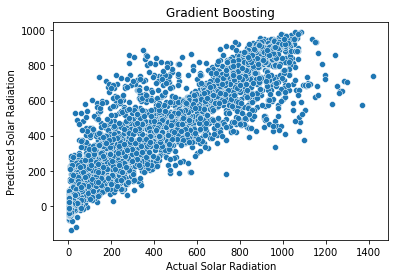

In [2]:
import cProfile,pstats

# Initializing profile class and calling rf function
profiler = cProfile.Profile()
profiler.enable()
gb()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')

# Print the stats report
stats.print_stats()  

In [3]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         10216575 function calls (10179132 primitive calls) in 14.511 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   14.513    7.257 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3325(run_code)
   1294/2    0.031    0.000   14.513    7.257 {built-in method builtins.exec}
        1    0.001    0.001   14.513   14.513 C:\Users\srimo\AppData\Local\Temp\ipykernel_6164\684219132.py:1(<cell line: 6>)
        1    0.015    0.015   14.512   14.512 C:\Users\srimo\AppData\Local\Temp\ipykernel_6164\2683330978.py:1(gb)
   1287/4    0.017    0.000    6.909    1.727 <frozen importlib._bootstrap>:1022(_find_and_load)
   1281/4    0.011    0.000    6.909    1.727 <frozen importlib._bootstrap>:987(_find_and_load_unlocked)
   1239/5    0.011    0.000    6.895    1.379 <frozen importlib

        1    0.000    0.000    0.016    0.016 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:1(<module>)
        2    0.000    0.000    0.016    0.008 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:638(__init__)
       16    0.000    0.000    0.015    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\ticker.py:433(__init__)
     2098    0.006    0.000    0.015    0.000 <frozen importlib._bootstrap_external>:132(_path_split)
        1    0.000    0.000    0.015    0.015 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\font_manager.py:1(<module>

     9015    0.005    0.000    0.005    0.000 {method 'rpartition' of 'str' objects}
      456    0.001    0.000    0.005    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\font_manager.py:968(_json_decode)
        1    0.000    0.000    0.005    0.005 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\colors\__init__.py:1(<module>)
        1    0.000    0.000    0.005    0.005 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\random.py:1(<module>)
      239    0.000    0.000    0.005    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\rcsetup.py:282(validate_color_for_prop_cycle

      784    0.000    0.000    0.002    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\artist.py:405(pchanged)
       26    0.000    0.000    0.002    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\typing.py:1223(__getitem__)
        4    0.002    0.000    0.002    0.000 {pandas._libs.tslibs.tzconversion.tz_localize_to_utc}
     9645    0.002    0.000    0.002    0.000 {method 'lower' of 'str' objects}
        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\base_parser.py:1(<module>)
        1    0.000    0.000    0.002    0.002 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ex

     3703    0.001    0.000    0.001    0.000 {method 'read' of '_io.StringIO' objects}
    78/76    0.000    0.000    0.001    0.000 {method 'view' of 'numpy.ndarray' objects}
      736    0.001    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\rcsetup.py:180(validator)
        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\linalg\_decomp.py:1(<module>)
        1    0.000    0.000    0.001    0.001 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_subplots.py:58(set_subplotspec)
      362    0.000    0.000    0.001    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\

       14    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\_lib\doccer.py:236(unindent_string)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\sparse\_bsr.py:22(bsr_matrix)
       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axis.py:439(_get_text2_transform)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\categorical.py:248(Categorical)
        2    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftw

       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\traitlets.py:1070(__init__)
      291    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\common.py:144(classes)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\markers.py:435(_set_circle)
       63    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1277(is_math_text)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSof

       81    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\overrides.py:121(decorator)
       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\c_parser_wrapper.py:359(<setcomp>)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\common.py:100(is_bool_indexer)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cm.py:537(set_cmap)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoft

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\frozen.py:1(<module>)
      145    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\inspect.py:182(ismodule)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:7910(asarray)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:5428(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python

       52    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py:142(__init__)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:367(_init_state)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\patches.py:511(set_hatch)
        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\__init__.py:250(_logged_cached)
        3    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundatio

       36    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\glob.py:215(_ishidden)
        3    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\util\_validators.py:253(validate_axis_style_args)
        8    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\generic.py:562(_get_block_manager_axis)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:679(ElasticNet)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundati

        1    0.000    0.000    0.000    0.000 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\xml\etree\ElementTree.py:125(Element)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\extras.py:1513(__init__)
        2    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\_config\config.py:499(deprecate_option)
       12    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\array_algos\take.py:324(_view_wrapper)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2k

        6    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1617(make_nancomp)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\reusable_executor.py:93(_ReusablePoolExecutor)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\_loss\glm_distribution.py:19(ExponentialDispersionModel)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:490(BaseSGDClassifier)
        1    0.00

       11    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:2399(_all_dispatcher)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\arrayprint.py:1351(StructuredVoidFormat)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:194(<listcomp>)
        9    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\common.py:221(<genexpr>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Python

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_dual_annealing.py:22(VisitingDistribution)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ode.py:1040(zvode)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\base.py:258(ConstantDenseOutput)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_continuous_distns.py:2787(erlang_gen)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\computation\ops.py:552(UnaryOp)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\base_parser.py:807(_check_data_length)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\parsers\c_parser_wrapper.py:303(<listcomp>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\formats\excel.py:52(ExcelCell)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\App

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:3464(LineEnd)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:4420(_Indent)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyparsing\core.py:5444(Dict)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\backend_bases.py:1482(KeyEvent)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz

        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\numeric.py:2384(_array_equal_dispatcher)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\function_base.py:111(<lambda>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\__init__.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\util\__init__.py:1(<module>)
        1    0.000    0.000    0.000    0.000 C:\Users\srimo\AppData\Local\Packages\Python

Gradient Boosting: R^2=0.883, MAE=57.354, RMSE=107.920
 
*** Profile stats marshalled to file 'C:\\Users\\srimo\\AppData\\Local\\Temp\\tmp1l1g50l9'.
Embedding SnakeViz in this document...


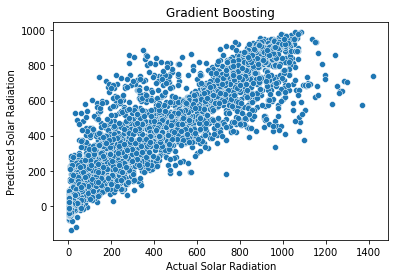

In [4]:
%load_ext snakeviz
%snakeviz gb()